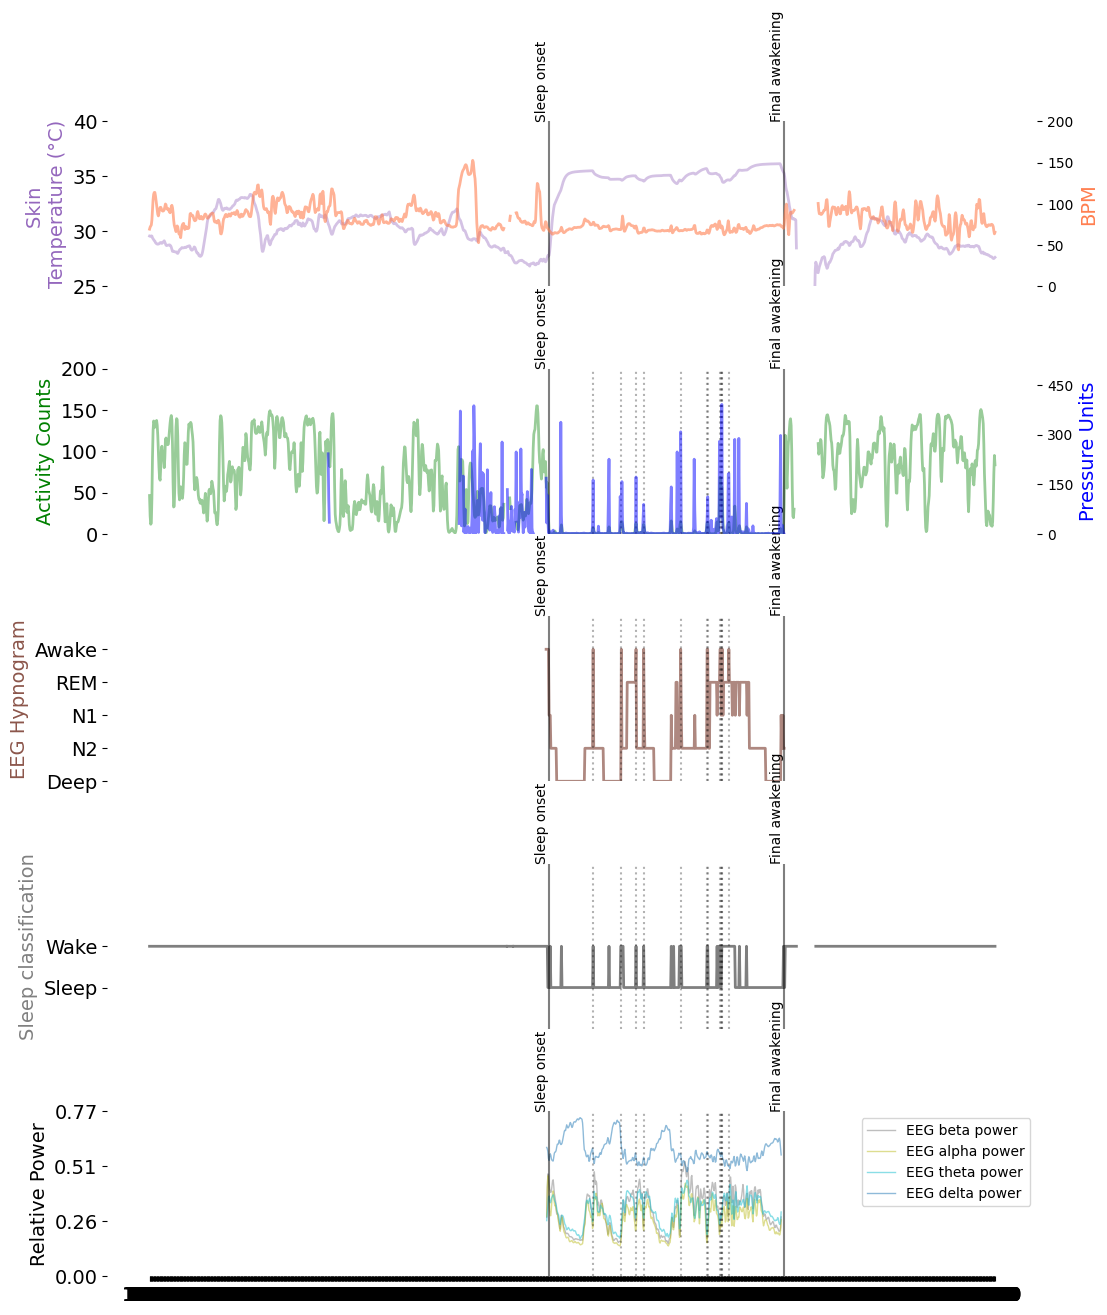

In [10]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage import gaussian_filter
import matplotlib.dates as mdates
import pytz
from datetime import datetime
from scipy.ndimage import gaussian_filter  # For smoothing signals
import matplotlib.dates as mdates          # For date formatting in plots

# Load the data from CSV file
Figure_3_measures = pd.read_csv('/mnt/home/mhacohen/ceph/tables/Figure_2_measures.csv')

# List of columns containing numeric data for plotting
numeric_columns = ['pulse_rate_bpm', 'activity_counts', 'Pressure difference', 
                  'Embrace Sleep calssification', 'Sleep Stage', 'temperature']

# Create figure with 5 subplots stacked vertically, sharing x-axis
fig, axes = plt.subplots(5, 1, figsize=(12, 15), sharex=True)

# Plot 1: Temperature and Heart Rate
# Create first line for temperature data
line1, = axes[0].plot(Figure_3_measures['time'], Figure_3_measures['temperature'], 
                     label='Temperature', alpha=0.4, lw=2, color='C4')
axes[0].set_ylim(25, 40)  # Set y-axis limits for temperature
axes[0].set_ylabel('Skin \nTemperature (°C)', color='C4', fontsize=14)

# Create twin axis for heart rate
ax_temp_hr = axes[0].twinx()  # Create second y-axis sharing same x-axis
# Plot heart rate with Gaussian smoothing
line2, = ax_temp_hr.plot(Figure_3_measures['time'], 
                        gaussian_filter(Figure_3_measures['pulse_rate_bpm'], sigma=1, mode='wrap'), 
                        alpha=0.6, lw=2, color='coral')
ax_temp_hr.set_ylim(0, 200)
ax_temp_hr.set_yticks([0,50, 100, 150,200])
ax_temp_hr.set_ylabel('BPM', color='coral', fontsize=14)

# Remove spines (border lines) for cleaner look
ax = ax_temp_hr
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Plot 2: Activity Count and Pressure
ax_activity = axes[1]
ax_pressure = ax_activity.twinx()  # Create twin axis for pressure

# Plot activity counts with Gaussian smoothing
line2, = ax_activity.plot(Figure_3_measures.time, 
                         gaussian_filter(Figure_3_measures['activity_counts'], sigma=1, mode='wrap'),
                         label='Activity Counts', alpha=0.4, lw=2, color='green')
# Plot pressure data with Gaussian smoothing
line3, = ax_pressure.plot(Figure_3_measures['time'], 
                         gaussian_filter(Figure_3_measures['Pressure difference'], sigma=0.1, mode='wrap'),
                         label='Withings Pressure Change', alpha=0.5, lw=2, color='blue')

# Set labels and limits for activity and pressure
ax_activity.set_ylabel('Activity Counts', color='green', fontsize=14)
ax_activity.set_ylim(0, 200)
ax_pressure.set_ylim(0, 500)
ax_pressure.set_yticks([0,150, 300, 450])
ax_pressure.set_ylabel('Pressure Units', color='blue', fontsize=14)

# Remove spines for pressure plot
ax = ax_pressure
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Plot 3: Hypnogram (sleep stages)
axes[2].plot(Figure_3_measures['time'], -Figure_3_measures['Sleep Stage'], 
             label='Dreem Sleep Staging', lw=2, color='C5', alpha=0.7)
# Set up y-axis labels for sleep stages
axes[2].set_yticks([0, -1, -2, -3, -4])
axes[2].set_yticklabels(['Awake', 'REM', 'N1', 'N2', 'Deep'])
axes[2].set_ylabel('EEG Hypnogram', color='C5', fontsize=14)
axes[2].set_ylim(-4,1)

# Plot 4: Sleep/Wake Classification
# Convert sleep classifications (0.5 -> 0, 1 -> -1)
axes[3].plot(Figure_3_measures['time'], 
             Figure_3_measures['Embrace Sleep calssification'].replace({.5: 0,1:-1}),
             lw=2, color='black', alpha=0.5)
axes[3].set_yticks([-1, 0])
axes[3].set_yticklabels(['Sleep', 'Wake'])
axes[3].set_ylabel('Sleep classification', color='grey', fontsize=14)
axes[3].set_ylim(-2,2)

# Plot 5: EEG Power Bands
axes[4].set_ylabel('EEG', fontsize=14)
# Plot different frequency bands with Gaussian smoothing
axes[4].plot(Figure_3_measures['time'], 
             gaussian_filter(Figure_3_measures['beta power'], sigma=1, mode='wrap'),
             label='EEG beta power', lw=1, color='C7', alpha=0.5)
axes[4].plot(Figure_3_measures['time'], 
             gaussian_filter(Figure_3_measures['alpha power'], sigma=1, mode='wrap'),
             label='EEG alpha power', lw=1, color='C8', alpha=0.5)
axes[4].plot(Figure_3_measures['time'],
             gaussian_filter(Figure_3_measures['theta power'], sigma=1, mode='wrap'),
             label='EEG theta power', lw=1, color='C9', alpha=0.5)
axes[4].plot(Figure_3_measures['time'], 
             gaussian_filter(Figure_3_measures['delta power'], sigma=1, mode='wrap'),
             label='EEG delta power', lw=1, color='C10', alpha=0.5)

# Format EEG plot
axes[4].set_ylabel('Relative Power', fontsize=14)
axes[4].legend(loc='upper right', fontsize=10)
y_min, y_max = axes[4].get_ylim()
y_ticks = np.linspace(0, y_max, num=4)
axes[4].set_yticks(y_ticks)
axes[4].set_yticklabels([f"{tick:.2f}" for tick in y_ticks])

# Format x-axis time display for all subplots
for ax in axes:
    timezone = pytz.timezone('America/New_York')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=timezone))
    ax.tick_params(axis='both', which='major', labelsize=14)

# Hide x-axis labels for all but the bottom plot
for ax in axes[:-1]:
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Remove spines from all plots for cleaner look
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Find sleep onset and final awakening times
sleep_data = Figure_3_measures['Sleep Stage']
sleep_times = Figure_3_measures['time'][sleep_data > 0]
sleep_onset = sleep_times.iloc[0]
final_awakening = sleep_times.iloc[-1]

# Add vertical lines and labels for sleep onset and final awakening
for ax in axes:
    # Add vertical lines
    ax.axvline(x=sleep_onset, color='k', linestyle='-', alpha=0.5)
    ax.axvline(x=final_awakening, color='k', linestyle='-', alpha=0.5)
    
    # Add text labels
    ax.text(sleep_onset, ax.get_ylim()[1], 'Sleep onset', 
            rotation=90, verticalalignment='bottom', horizontalalignment='right')
    ax.text(final_awakening, ax.get_ylim()[1], 'Final awakening', 
            rotation=90, verticalalignment='bottom', horizontalalignment='right')

# Add dotted lines for awakenings during sleep period
hypnogram_data = Figure_3_measures['Sleep Stage']
awakening_times = Figure_3_measures['time'][hypnogram_data == 0]  # Find wake periods

# Add vertical dotted lines for each awakening
for wake_time in awakening_times:
    if wake_time > sleep_onset and wake_time < final_awakening:
        for ax in axes[1:]:  # Add lines to all plots except the first
            ax.axvline(x=wake_time, color='k', linestyle=':', alpha=0.3)

# Display the plot
plt.show()